In [1]:
import scanpy as sc

In [2]:
eb_umap = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/eb_pflog1ppfnorm.hvg.umap_embedding.h5ad")

In [3]:
eb_umap

AnnData object with n_obs × n_vars = 909536 × 5000
    obs: 'sample_id', 'Collection.Date', 'Lane', 'Sample_ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library_prep_batch', 'Sequencing_batch', 'col_group', 'donor_id', 'prob_max', 'prob_doublet', 'n_vars', 'best_singlet', 'best_doublet', 'doublet_logLikRatio', 'Line.True', 'Line.StockLabel', 'contaminated', 'swapped', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Formation.replicate', 'collection.replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'collection.group.label', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'leiden_coarse', 'sizeFactor', 'scranGroup', 'scranCluster', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'mea

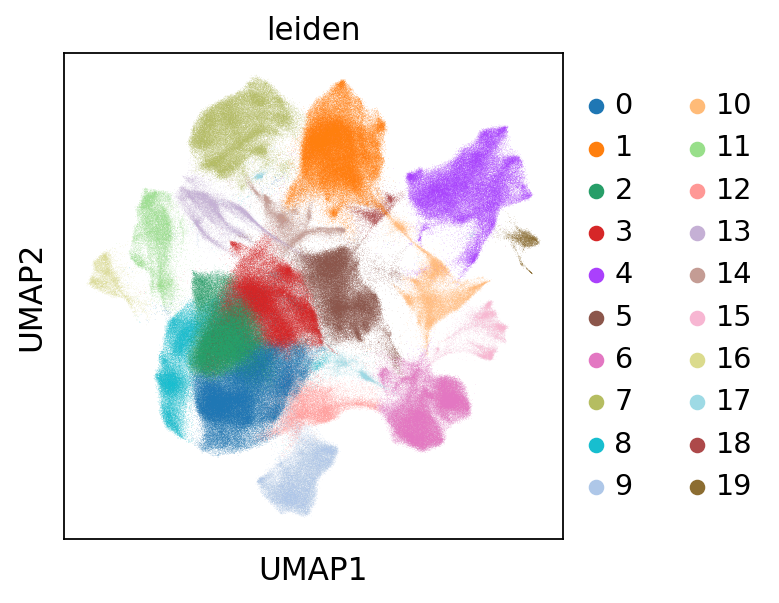

In [5]:
sc.set_figure_params(figsize=(4, 4))
sc.pl.umap(eb_umap, color='leiden')

In [11]:
test = pd.read_csv("/project2/gilad/jpopp/ebQTL/data/fca/protein_coding_genes.tsv", sep="\t")

In [19]:
test_overlap = test.loc[test['hgnc'].isin(eb_umap.var_names)]

In [28]:
huh = eb_umap[:, test_overlap['hgnc']].copy()

In [30]:
huh

AnnData object with n_obs × n_vars = 909536 × 2915
    obs: 'sample_id', 'Collection.Date', 'Lane', 'Sample_ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library_prep_batch', 'Sequencing_batch', 'col_group', 'donor_id', 'prob_max', 'prob_doublet', 'n_vars', 'best_singlet', 'best_doublet', 'doublet_logLikRatio', 'Line.True', 'Line.StockLabel', 'contaminated', 'swapped', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Formation.replicate', 'collection.replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'collection.group.label', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'leiden_coarse', 'sizeFactor', 'scranGroup', 'scranCluster', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'mea

In [31]:
huh.X = huh.layers['log1pPF']

In [2]:
um = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/eb_pflog1ppfnorm.fca_hvg.h5ad")

In [ ]:
import numpy as np
np.sum(um.X > 0)

In [4]:
um.X

<909536x2017 sparse matrix of type '<class 'numpy.float32'>'
	with 261411059 stored elements in Compressed Sparse Row format>

In [2]:
quick_check = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/highpass/eb_raw.h5ad")

In [8]:
quick_check.obs['donor_sample'] = quick_check.obs['sample_id'].astype(str) + '--' + quick_check.obs['donor_id'].astype(str)

In [9]:
summary = quick_check.obs[['donor_sample']].value_counts()

donor_sample   
1008_3--NA18505    3763
1008_2--NA18505    3718
1008_4--NA18505    3547
1008_1--NA18505    3532
1008_2--NA19116    3448
                   ... 
1022_2--NA19108      42
1015_1--NA19203      40
1015_7--NA19203      39
1022_8--NA19108      38
1015_3--NA19203      35
Length: 729, dtype: int64

In [10]:
summary = quick_check.obs[['donor_sample']].value_counts()

In [11]:
import numpy as np
np.median(summary)

1241.0

In [12]:
libsizes = quick_check.X.sum(axis=1)

In [19]:
np.median(libsizes[:, 0])

matrix([[ 5309.,  5843., 10901., ..., 68415., 78799., 95530.]])

In [22]:
np.median(libsizes, axis=0)

matrix([[21990.]])